### Name - Mohit Ram Sharma, Roll number- 224161018

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Problem 1

In [202]:
def multimodal(x,y):
    z1=1.7*np.exp(-((((x-3)**2)/10)+(((y-3)**2)/10)))+np.exp(-((((x+5)**2)/8)+(((y+5)**2)/8)))+2*np.exp(-(((x**2)/4)+((y**2)/5)))
    z2=1.5*np.exp(-((((x-4)**2)/18)+(((y+4)**2)/16)))+1.2*np.exp(-((((x+4)**2)/18)+(((y-4)**2)/16)))
    return z1+z2

In [203]:
x=np.arange(-10,10.1,0.1)
y=np.arange(-10,10.1,0.1)
z=np.zeros((len(x),len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        z[i,j]=multimodal(x[i],y[j])
x,y=np.meshgrid(x,y)

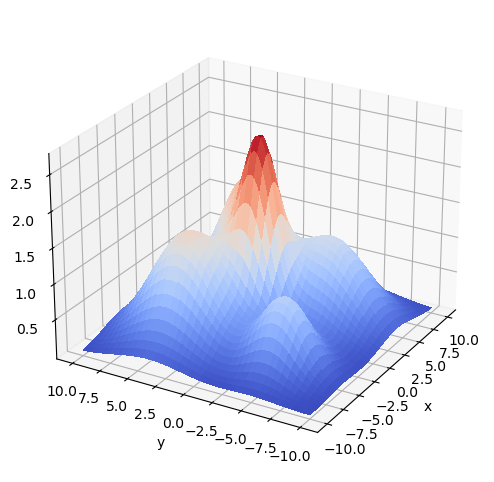

In [206]:
fig=plt.figure(figsize=(8,6))
ax=plt.axes(projection='3d')
ax.plot_surface(x,y,z,cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.view_init(25,210)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

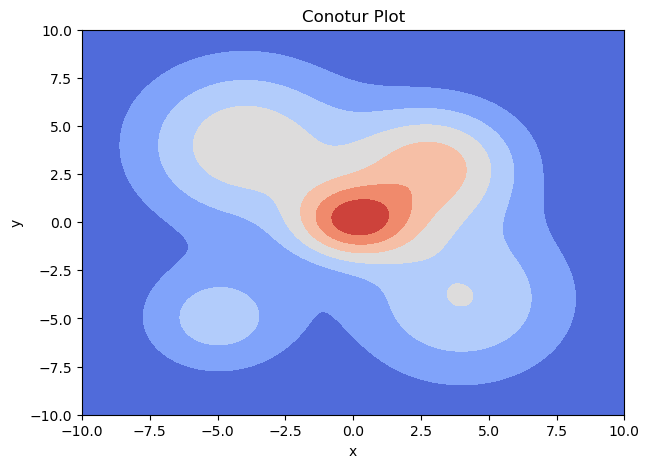

In [207]:
fig=plt.figure(figsize=(7,5))
ax=plt.axes()
ax.contourf(x,y,z,cmap=cm.coolwarm)
plt.title("Conotur Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [208]:
def gradient(x,y):
    grad_x1=1.7*(-(x-3)/5)*np.exp(-((((x-3)**2)/10)+(((y-3)**2)/10)))+(-(x+5)/4)*np.exp(-((((x+5)**2)/8)+(((y+5)**2)/8)))+2*(-x/2)*np.exp(-(((x**2)/4)+((y**2)/5)))
    grad_x2=1.5*(-(x-4)/9)*np.exp(-((((x-4)**2)/18)+(((y+4)**2)/16)))+1.2*(-(x+4)/9)*np.exp(-((((x+4)**2)/18)+(((y-4)**2)/16)))
    grad_y1=1.7*(-(y-3)/5)*np.exp(-((((x-3)**2)/10)+(((y-3)**2)/10)))+(-(y+5)/4)*np.exp(-((((x+5)**2)/8)+(((y+5)**2)/8)))+2*(-y/2)*np.exp(-(((x**2)/4)+((y**2)/5)))
    grad_y2=1.5*(-(y+4)/8)*np.exp(-((((x-4)**2)/18)+(((y+4)**2)/16)))+1.2*(-(y-4)/8)*np.exp(-((((x+4)**2)/18)+(((y-4)**2)/16)))
    grad_x=grad_x1+grad_x2
    grad_y=grad_y1+grad_y2
    return np.array([[grad_x],[grad_y]])

In [209]:
def gradient_ascent(eta,iterations,X):
    all_X=np.zeros((2,iterations+1))
    all_X[:,0]=X[:,0]
    for i in range(iterations):
        X=X+eta*gradient(X[0,0],X[1,0])
        all_X[:,i+1]=X[:,0]
    return X,all_X
        

In [242]:
def plot_trajectory(all_X):
  '''
  Plot the trajectory of the points obtained in gradient descent algorithm on 
  the contour plot of the error surface on (a,b) plane
  '''
  x_axis_width=abs(0-all_X[0,:]).max()+0.2
  y_axis_width=abs(0-all_X[1,:]).max()+0.2
  x_axis=np.linspace(0-x_axis_width,0+x_axis_width,101)
  y_axis=np.linspace(0-y_axis_width,0+y_axis_width,101)
   
  z=np.zeros((len(x_axis),len(y_axis)))
  for i in range(len(x_axis)):
      for j in range(len(y_axis)):
          z[i,j]=multimodal(x_axis[i],y_axis[j])
        
  a_axis,b_axis = np.meshgrid(x_axis,y_axis)
  fig=plt.figure(figsize=(8,6)) 
  ax = plt.axes()
  ax.contourf(x_axis,y_axis,z,cmap=cm.coolwarm)
  ax.plot(all_X[0,:],all_X[1,:],color='red',)
  ax.set_title('Trajectory of the solution obtained via gradient descent')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  plt.show()

[0.20935286 0.16619341]


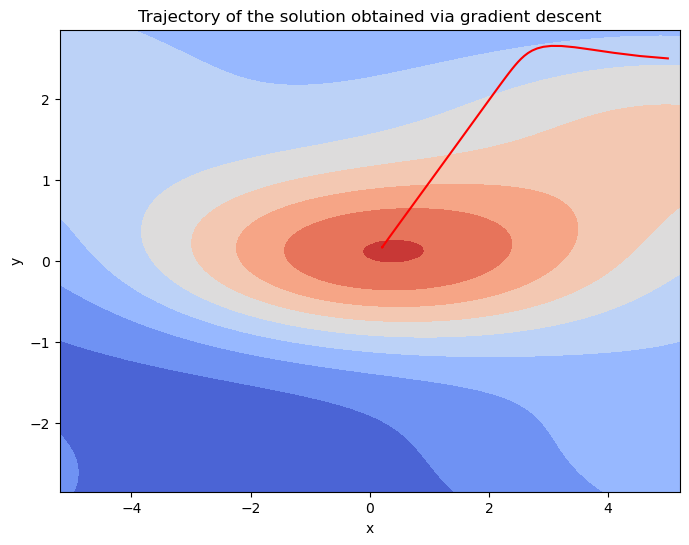

In [366]:
X=np.array([[5],[2.5]])
(X,all_X)=gradient_ascent(1,100,X)
print(all_X[:,-1])
plot_trajectory(all_X)

[0.20935286 0.16619341]


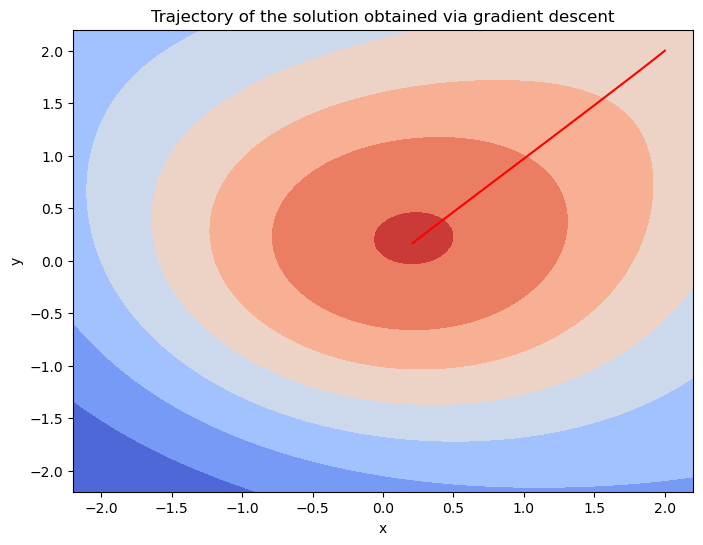

In [365]:
X=np.array([[2],[2]])
(X,all_X)=gradient_ascent(0.3,100,X)
print(all_X[:,-1])
plot_trajectory(all_X)

[-4.92943967 -4.95750282]


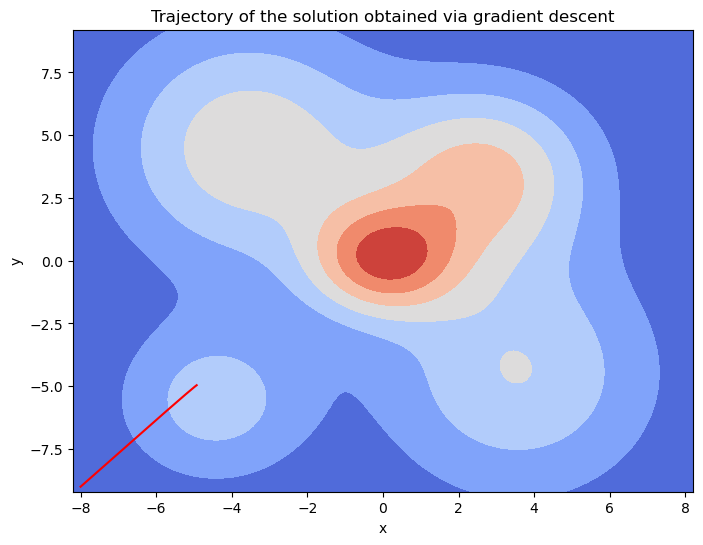

In [360]:
X=np.array([[-8],[-9]])
(X,all_X)=gradient_ascent(0.1,1000,X)
print(all_X[:,-1])
plot_trajectory(all_X)

[ 3.95620079 -3.87473616]


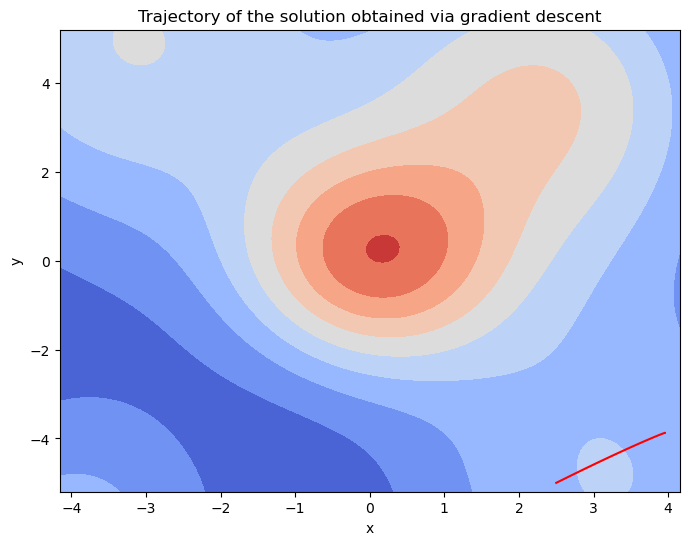

In [363]:
X=np.array([[2.5],[-5]])
(X,all_X)=gradient_ascent(1,100,X)
print(all_X[:,-1])
plot_trajectory(all_X)

# Problem 2

In [191]:
def outlierCorruption(y_noisy,y_actual,alpha):
    mean_y=y_noisy.mean()
    std_y=y_noisy.std()
    outlier_indices=np.random.randint(0,y_noisy.shape[0],size=int(alpha*len(y_noisy)))
    y_outlier=y_noisy[outlier_indices]+np.sign(y_noisy[outlier_indices]-y_actual[outlier_indices])*std_y
    return outlier_indices,y_outlier
def generateDataSet(a,b,x_min,x_max,n,alpha,sigma):
    x=np.linspace(x_min,x_max,n)
    y_actual=a*x+b
    y_noisy=y_actual+sigma*np.random.randn(n)
    (outlier_indices,y_outlier)=outlierCorruption(y_noisy,y_actual,alpha)
    plt.plot(x,y_actual)
    plt.scatter(x,y_noisy,color='blue')
    plt.scatter(x[outlier_indices],y_outlier,color='red')
    plt.title("Dataset with outliers")
    plt.show()
    return y_outlier,y_noisy,y_actual,outlier_indices

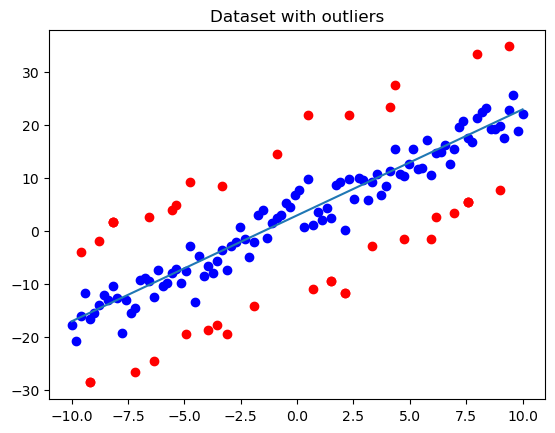

In [197]:
(y_outlier,y_noisy,y_actual,outlier_indices)=generateDataSet(a=2,b=3,x_min=-10,x_max=10,n=100,alpha=0.4,sigma=3)

# Problem 3

In [341]:
def pseudo_inverse_soln(D):
    x=D[:,0]
    x=x.reshape(-1,1)
    y=D[:,1]
    y=y.reshape(-1,1)
    A = np.concatenate((np.ones((len(x),1)),x),axis=1)
    P=np.dot(np.linalg.inv(np.dot(A.transpose(),A)),np.dot(A.transpose(),y))
    a=P[1]
    b=P[0]
    y_pred=a*x+b
    return a,b,y_pred
def compute_error(y,y_pred):
    err=y.reshape(-1,1)-y_pred
    err=np.abs(err)
    mu_k=err.mean()
    std_k=err.mean()
    return err,mu_k,std_k
def outlier_set(D,err,mu_k,std_k,lamda):
    outlier_indices=(err > mu_k+lamda*(std_k)).reshape(1,-1)[0]
    D_out=D[outlier_indices,:]
    return D_out,outlier_indices
def regression_diagnostics(D,lamda,eta,k_max):
    for k in range(k_max):
        (a,b,y_pred)=pseudo_inverse_soln(D)
        (err,mu_k,std_k)=compute_error(D[:,1],y_pred)
        plt.plot(D[:,0],y_pred)
        lamda=1.5
        (D_out,outlier_indices)=outlier_set(D,err,mu_k,std_k,lamda)
        plt.scatter(D_out[:,0],D_out[:,1],color='red')
        D=D[np.invert(outlier_indices)]
        plt.scatter(D[:,0],D[:,1],color='blue')
        if ((D.shape[0]/D.shape[1])<=eta) or (k==k_max):
            break
        plt.title(f"Iteration number {k+1}")
        plt.show()
    return a,b

## alpha = 0.1

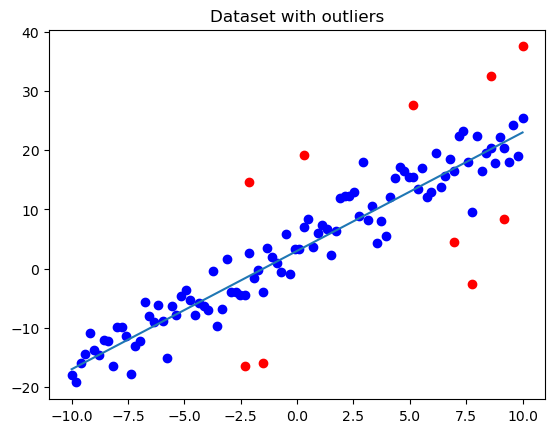

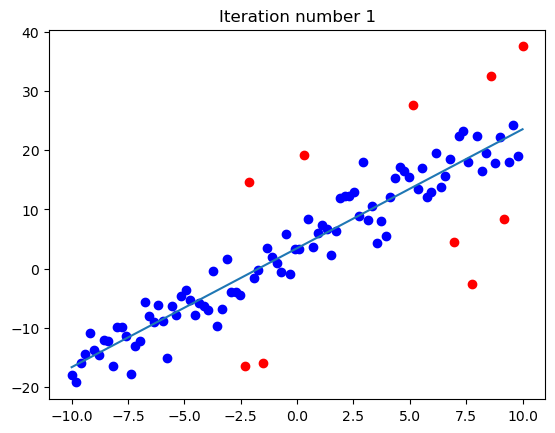

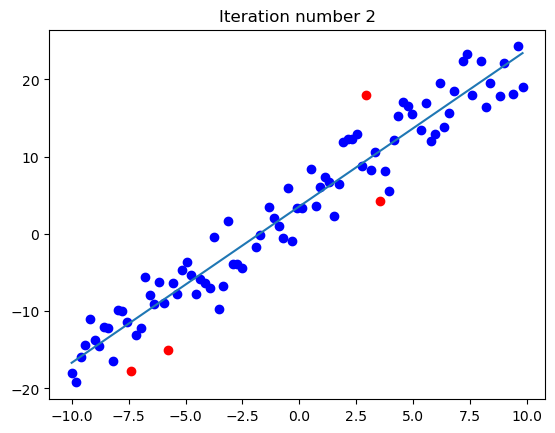

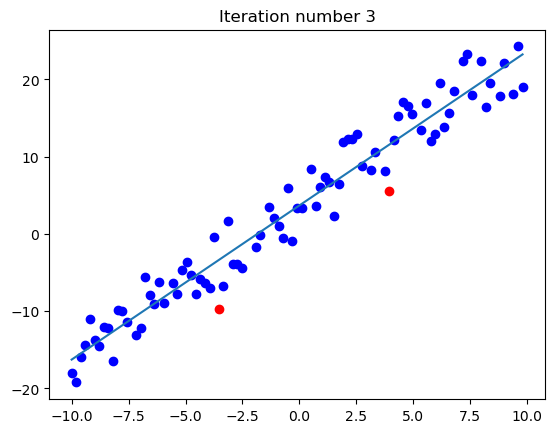

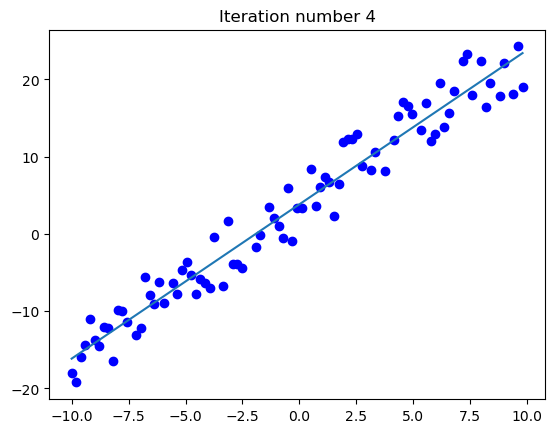

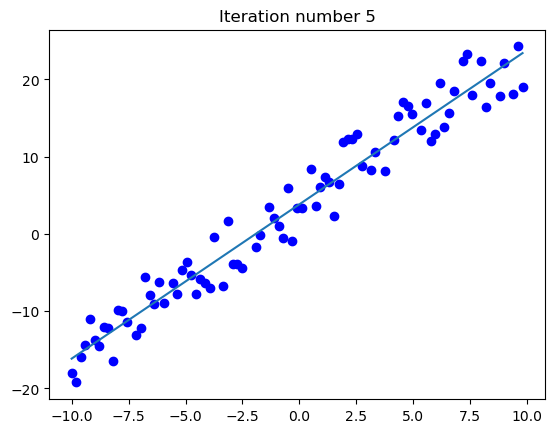

(array([1.99761498]), array([3.827087]))

In [342]:
(y_outlier,y_noisy,y_actual,outlier_indices)=generateDataSet(a=2,b=3,x_min=-10,x_max=10,n=100,alpha=0.1,sigma=3)
y_noisy[outlier_indices]=y_outlier
x=np.linspace(-10,10,100)
D=np.column_stack((x,y_noisy))
k_max=5
eta=0.8
lamda=1.5
regression_diagnostics(D,lamda,eta,k_max)

## alpha = 0.2

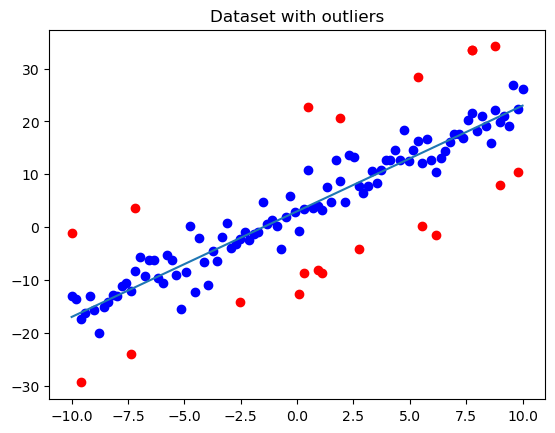

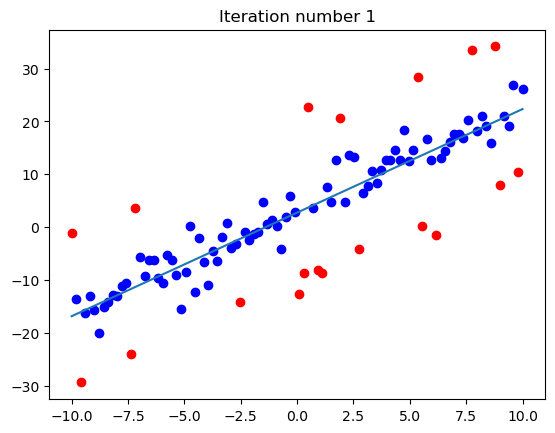

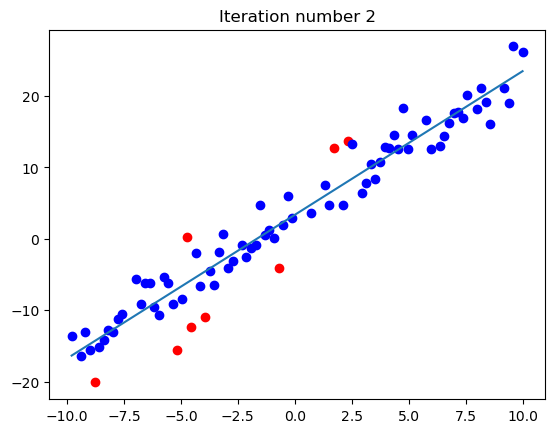

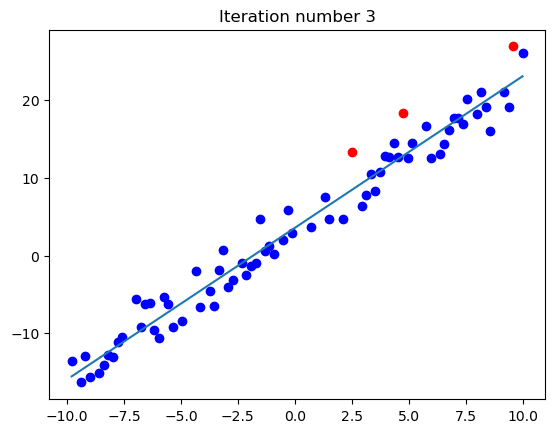

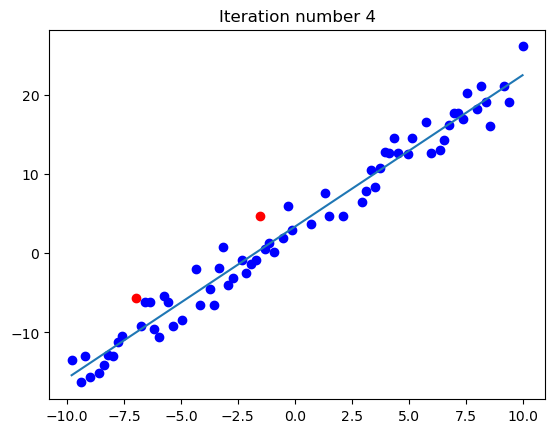

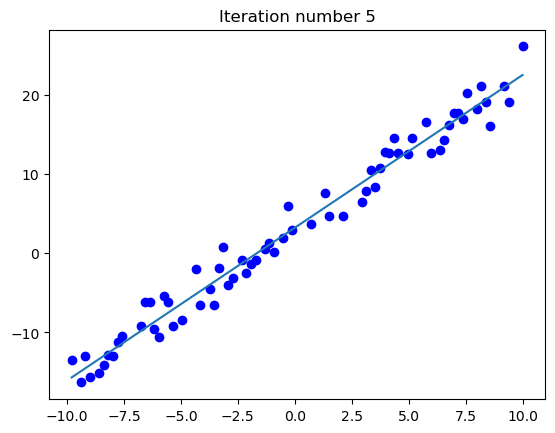

(array([1.93062711]), array([3.22021847]))

In [343]:
(y_outlier,y_noisy,y_actual,outlier_indices)=generateDataSet(a=2,b=3,x_min=-10,x_max=10,n=100,alpha=0.2,sigma=3)
y_noisy[outlier_indices]=y_outlier
x=np.linspace(-10,10,100)
D=np.column_stack((x,y_noisy))
k_max=5
eta=0.8
lamda=1.5
regression_diagnostics(D,lamda,eta,k_max)

## alpha = 0.3

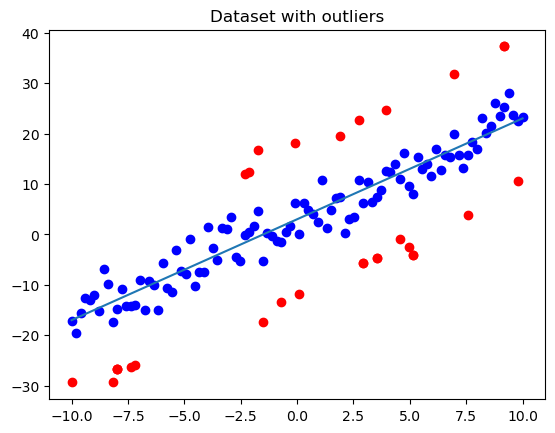

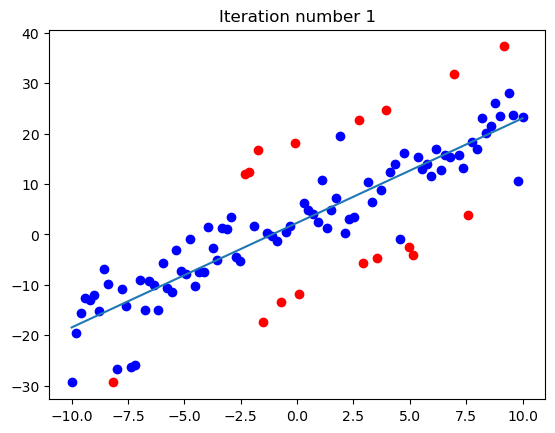

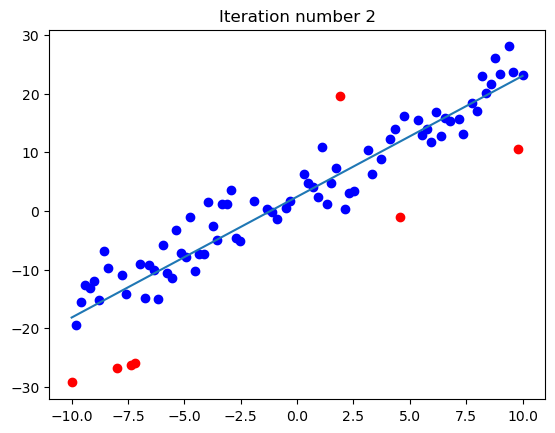

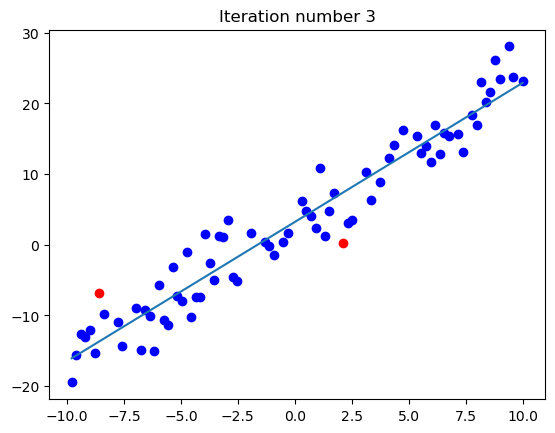

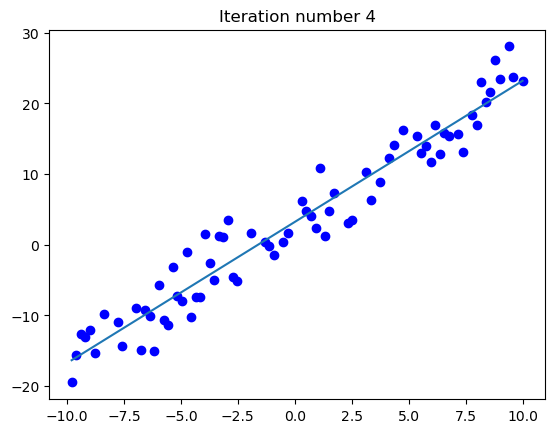

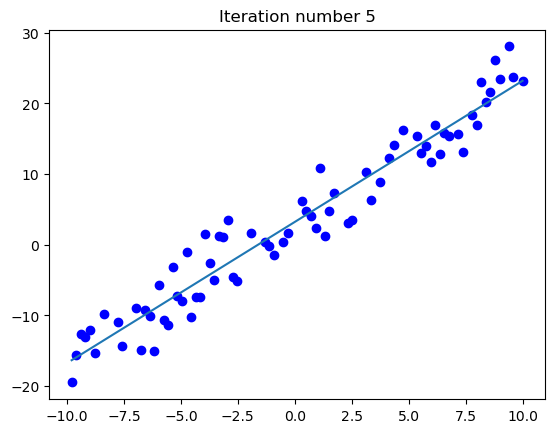

(array([1.99644155]), array([3.22993331]))

In [344]:
(y_outlier,y_noisy,y_actual,outlier_indices)=generateDataSet(a=2,b=3,x_min=-10,x_max=10,n=100,alpha=0.3,sigma=3)
y_noisy[outlier_indices]=y_outlier
x=np.linspace(-10,10,100)
D=np.column_stack((x,y_noisy))
k_max=5
eta=0.8
lamda=1.5
regression_diagnostics(D,lamda,eta,k_max)

## alpha = 0.49

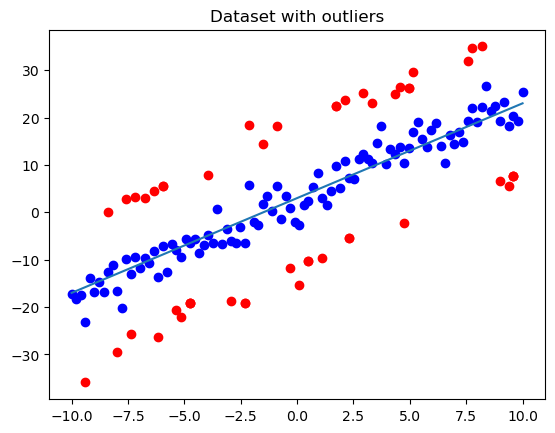

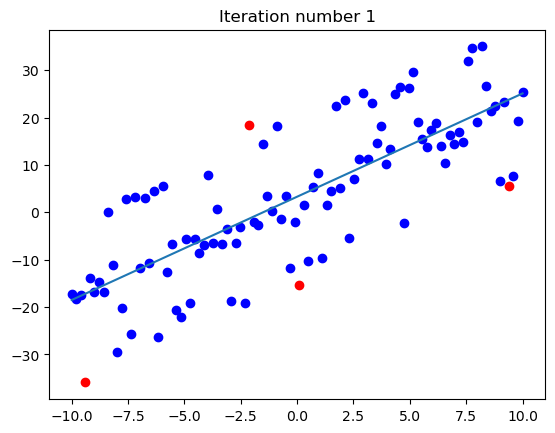

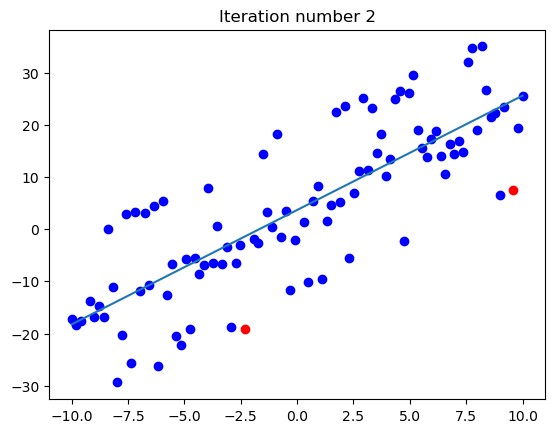

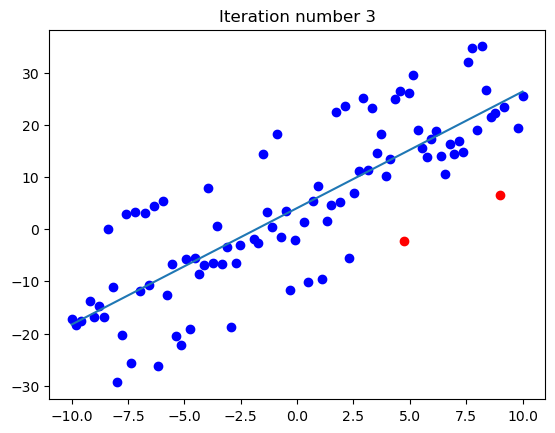

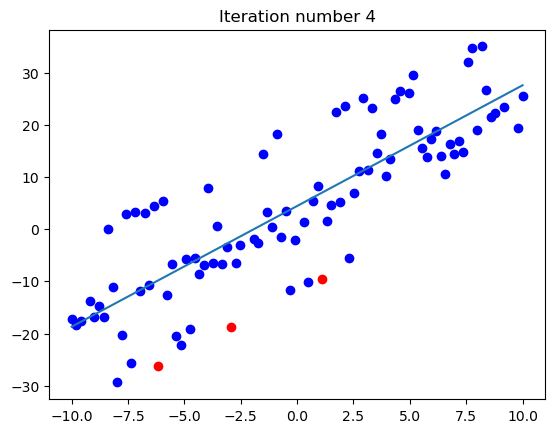

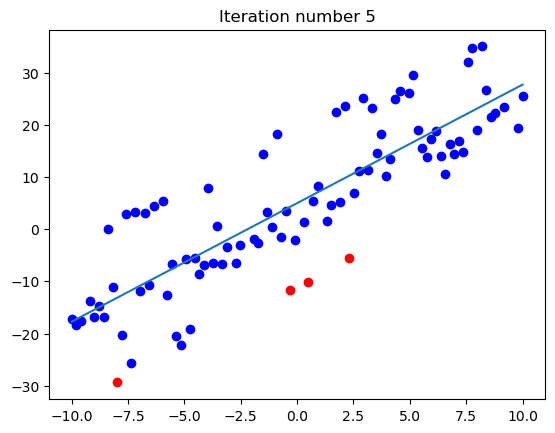

(array([2.27111502]), array([4.97892654]))

In [352]:
(y_outlier,y_noisy,y_actual,outlier_indices)=generateDataSet(a=2,b=3,x_min=-10,x_max=10,n=100,alpha=0.49,sigma=3)
y_noisy[outlier_indices]=y_outlier
x=np.linspace(-10,10,100)
D=np.column_stack((x,y_noisy))
k_max=5
eta=0.8
lamda=1.5
regression_diagnostics(D,lamda,eta,k_max)

# Problem 4

In [354]:
def pseudo_inverse_soln(D):
    x=D[:,0]
    x=x.reshape(-1,1)
    y=D[:,1]
    y=y.reshape(-1,1)
    A = np.concatenate((np.ones((len(x),1)),x),axis=1)
    P=np.dot(np.linalg.inv(np.dot(A.transpose(),A)),np.dot(A.transpose(),y))
    a=P[1]
    b=P[0]
    return a,b

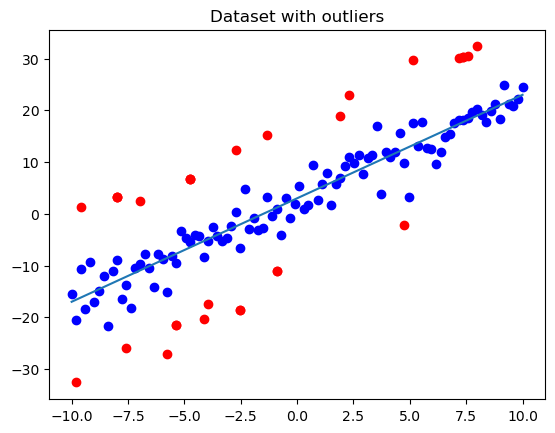

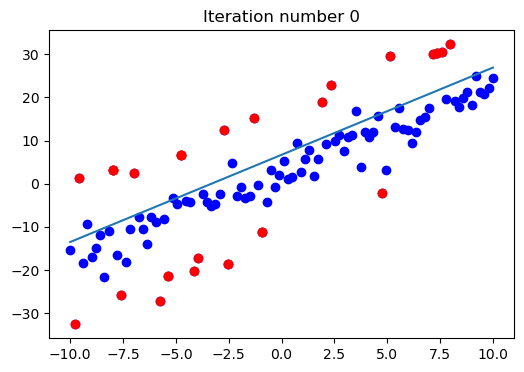

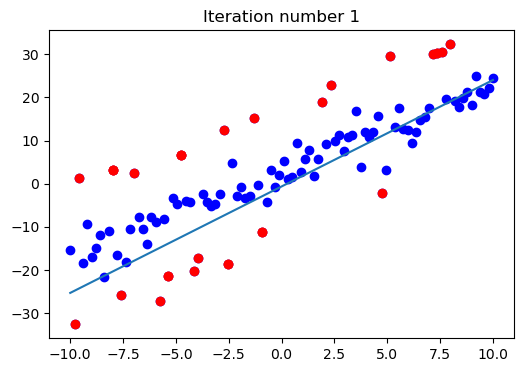

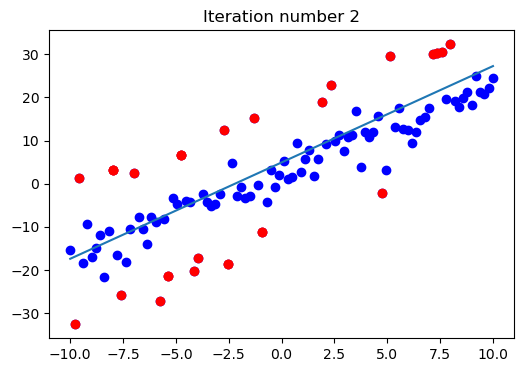

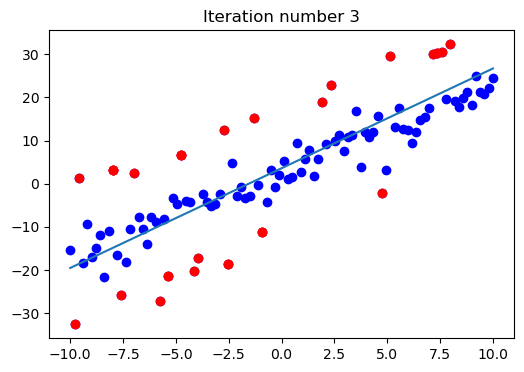

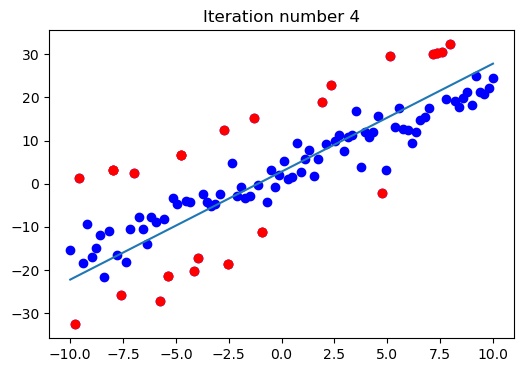

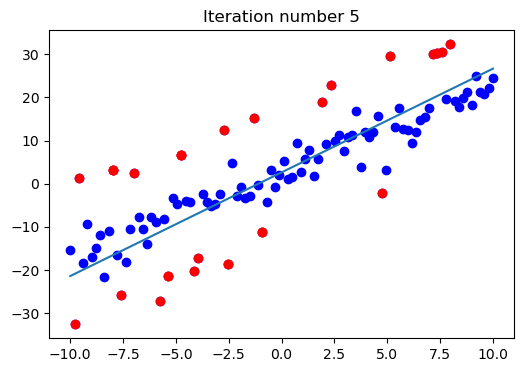

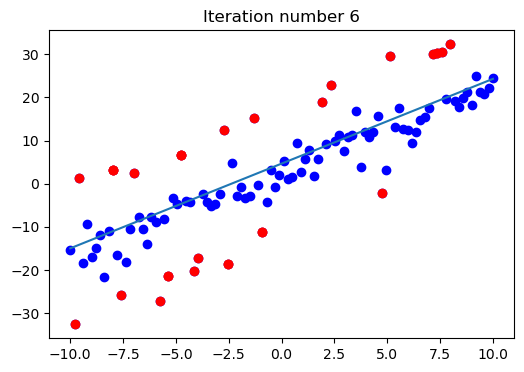

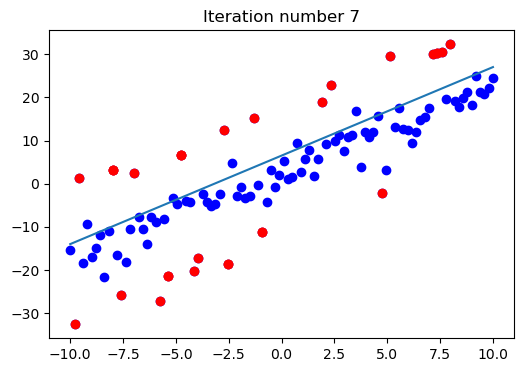

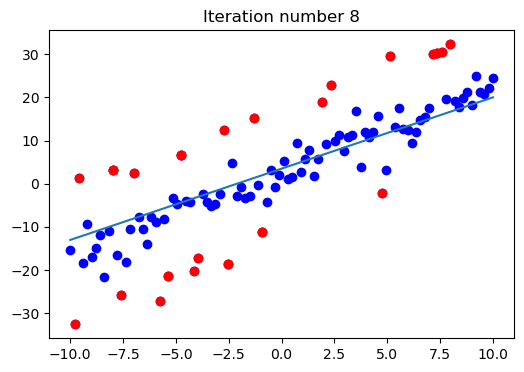

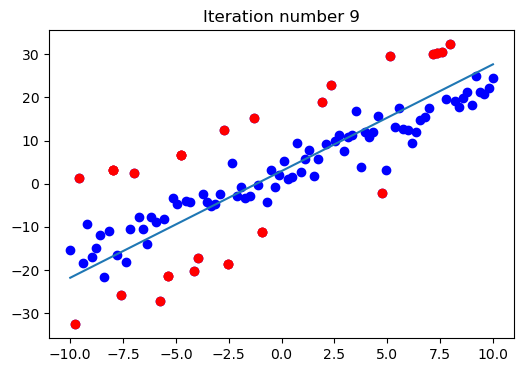

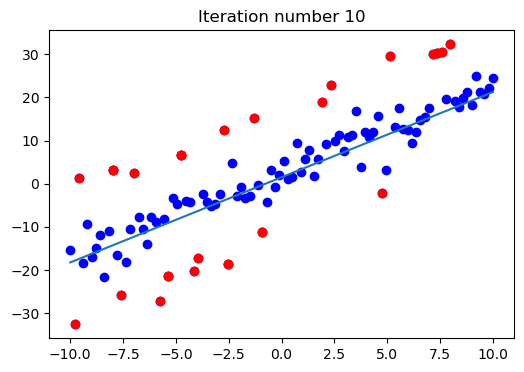

In [355]:
(y_outlier,y_noisy,y_actual,outlier_indices)=generateDataSet(a=2,b=3,x_min=-10,x_max=10,n=100,alpha=0.3,sigma=3)
y_noisy[outlier_indices]=y_outlier
x=np.linspace(-10,10,100)
x_outliers=x[outlier_indices]
D=np.column_stack((x,y_noisy))

n=D.shape[0]
sample_size=10
max_iterations=10
err_list=[]
parameter_list=[]

for i in range(max_iterations+1):
    sample_indices = np.random.choice(n,sample_size, replace=False)
    sample_data=D[sample_indices,:]
    plt.figure(figsize=(6,4))
    plt.scatter(x,y_noisy,color='blue')
    plt.scatter(x_outliers,y_outlier,color='red')
    (a,b)=pseudo_inverse_soln(sample_data)
    parameter_list.append((a,b))
    y_pred=a*x+b
    plt.plot(x,y_pred)
    plt.title(f"Iteration number {i}")
    err=((y_noisy-y_pred)**2).mean()
    err_list.append(err)
    plt.show()

Best model parameters are a = 2.3134073214470456, b = 3.5953859897818417
Minimum error(MSE) is 54.450944678656036


Text(0.5, 1.0, 'Line/Model with minimum error')

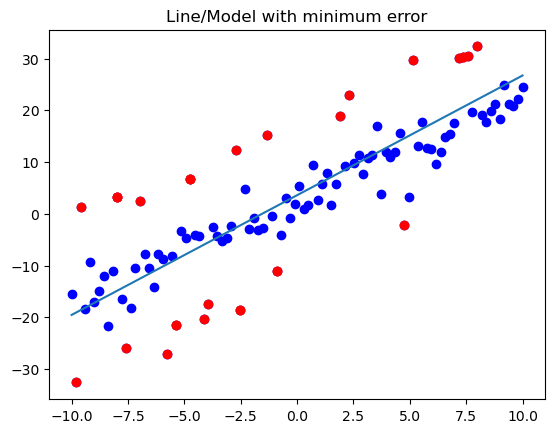

In [356]:
min_err_index=err_list.index(min(err_list))
(a,b)=parameter_list[min_err_index]
y_final=a*x+b
print(f"Best model parameters are a = {a[0]}, b = {b[0]}")
print(f"Minimum error(MSE) is {min(err_list)}")
plt.scatter(x,y_noisy,color='blue')
plt.scatter(x_outliers,y_outlier,color='red')
plt.plot(x,y_final)
plt.title(f"Line/Model with minimum error")
